In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
x_train = pd.read_csv('Training Data/Diabetes_XTrain.csv')
y_train = pd.read_csv('Training Data/Diabetes_YTrain.csv')

print(x_train.shape)
print(y_train.shape)
print(x_train.head(5))
print(y_train.head(5))

(576, 8)
(576, 1)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      168             88             42      321  38.2   
1            8      110             76              0        0  27.8   
2            7      147             76              0        0  39.4   
3            2      100             66             20       90  32.9   
4            4      129             86             20      270  35.1   

   DiabetesPedigreeFunction  Age  
0                     0.787   40  
1                     0.237   58  
2                     0.257   43  
3                     0.867   28  
4                     0.231   23  
   Outcome
0        1
1        0
2        1
3        1
4        0


In [121]:
x_train = x_train.values
y_train = y_train.values

In [122]:
v = np.unique(y_train, return_counts = True)
print(v)

(array([0, 1], dtype=int64), array([375, 201]))


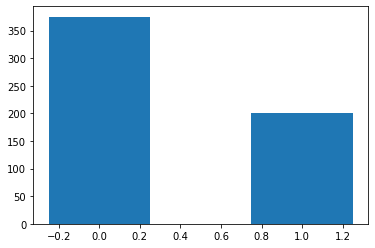

In [123]:
plt.bar(v[0], v[1], width = .5)
plt.show()

In [124]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x, y, queryPoint, k = 5):
    
    vals = []
    m = x.shape[0]
    
    for i in range(m):
        d = dist(x[i], queryPoint)
        vals.append((d, int(y[i])))
    
    vals = sorted(vals)
    
    k_vals = vals[:k]
    k_vals = np.array(k_vals)
    
    new_vals = np.unique(k_vals[:, 1], return_counts=True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [125]:
x_test = pd.read_csv('Diabetes_XTest.csv')
x_test = x_test.values

In [126]:
n = x_test.shape[0]
vals = []

for i in range(n):
    vals.append(int(knn(x_train, y_train, x_test[i], k = 15)))

vals = np.array(vals)

In [127]:
print(vals)

[0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1
 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1
 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0]


In [128]:
df = pd.DataFrame(vals, columns = ['Outcome'])

In [129]:
print(df)

     Outcome
0          0
1          0
2          0
3          0
4          0
..       ...
187        0
188        0
189        1
190        0
191        0

[192 rows x 1 columns]


In [130]:
df.to_csv('diabetes-challenge-outcome.csv', index = None)